In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
vitamin_df = pd.read_sas('./data/VID_L.xpt', format='xport')
vitamin_df


,SEQN,WTPH2YR,LBXVIDMS,LBDVIDLC,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC
0,130378.0,5.604213e+04,58.9,5.397605e-79,1.57,1.0,57.3,5.397605e-79,2.47,5.397605e-79
1,130379.0,3.743571e+04,60.5,5.397605e-79,1.57,1.0,58.9,5.397605e-79,3.40,5.397605e-79
2,130380.0,8.532884e+04,39.4,5.397605e-79,1.57,1.0,37.8,5.397605e-79,1.52,5.397605e-79
3,130381.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,5.963893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8722,142306.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8723,142307.0,6.899418e+04,147.0,5.397605e-79,1.57,1.0,145.0,5.397605e-79,15.90,5.397605e-79
8724,142308.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8725,142309.0,4.628442e+04,17.8,5.397605e-79,1.57,1.0,16.2,5.397605e-79,0.78,5.397605e-79


In [136]:
vitamin_df.isna().sum()

SEQN           0
WTPH2YR        0
LBXVIDMS    1420
LBDVIDLC    1420
LBXVD2MS    1420
LBDVD2LC    1420
LBXVD3MS    1419
LBDVD3LC    1419
LBXVE3MS    1489
LBDVE3LC    1489
dtype: int64

In [ ]:
vitamin_df = vitamin_df.dropna()
vitamin_df

,SEQN,WTPH2YR,LBXVIDMS,LBDVIDLC,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC
0,130378.0,56042.129410,58.9,5.397605e-79,1.57,1.000000e+00,57.3,5.397605e-79,2.47,5.397605e-79
1,130379.0,37435.705647,60.5,5.397605e-79,1.57,1.000000e+00,58.9,5.397605e-79,3.40,5.397605e-79
2,130380.0,85328.844519,39.4,5.397605e-79,1.57,1.000000e+00,37.8,5.397605e-79,1.52,5.397605e-79
5,130386.0,44526.214135,96.9,5.397605e-79,1.57,1.000000e+00,95.3,5.397605e-79,5.53,5.397605e-79
6,130387.0,22746.296353,26.7,5.397605e-79,1.57,1.000000e+00,25.1,5.397605e-79,1.10,5.397605e-79
...,...,...,...,...,...,...,...,...,...,...
8719,142303.0,47778.604939,80.6,5.397605e-79,6.05,5.397605e-79,74.5,5.397605e-79,5.64,5.397605e-79
8721,142305.0,49710.929024,93.0,5.397605e-79,1.57,1.000000e+00,91.4,5.397605e-79,7.19,5.397605e-79
8723,142307.0,68994.175834,147.0,5.397605e-79,1.57,1.000000e+00,145.0,5.397605e-79,15.90,5.397605e-79
8725,142309.0,46284.416719,17.8,5.397605e-79,1.57,1.000000e+00,16.2,5.397605e-79,0.78,5.397605e-79


In [138]:
if 'SEQN' in vitamin_df.columns:
    idx = vitamin_df['SEQN'].astype(int)
    vitamin_df = vitamin_df.drop(columns=['SEQN'])
vitamin_df = vitamin_df.set_index(idx)
vitamin_d_e = vitamin_df[['WTPH2YR', 'LBXVIDMS', 'LBXVD2MS', 'LBXVD3MS', 'LBXVE3MS']]
vitamin_d_e

,WTPH2YR,LBXVIDMS,LBXVD2MS,LBXVD3MS,LBXVE3MS
SEQN,,,,,
130378,56042.129410,58.9,1.57,57.3,2.47
130379,37435.705647,60.5,1.57,58.9,3.40
130380,85328.844519,39.4,1.57,37.8,1.52
130386,44526.214135,96.9,1.57,95.3,5.53
130387,22746.296353,26.7,1.57,25.1,1.10
...,...,...,...,...,...
142303,47778.604939,80.6,6.05,74.5,5.64
142305,49710.929024,93.0,1.57,91.4,7.19
142307,68994.175834,147.0,1.57,145.0,15.90


In [139]:
from autodp import autodp_core, mechanism_zoo, calibrator_zoo, privacy_calibrator
from autodp.mechanism_zoo import LaplaceMechanism

In [140]:
def sensitivity(df, col, func=np.mean):
    n = len(df)

    if func == np.median:
        return 2
    
    return (max(df[col]) - min(df[col])) / n


In [141]:
sensitivities = {}
for col in ['LBXVIDMS', 'LBXVD2MS', 'LBXVD3MS', 'LBXVE3MS']:
    sensitivities[col] = sensitivity(vitamin_d_e, col)
sensitivities

{'LBXVIDMS': 0.05747858524454269,
 'LBXVD2MS': 0.03128350373031224,
 'LBXVD3MS': 0.05773694390715667,
 'LBXVE3MS': 0.008601823708206687}

In [142]:
d_e_main = ['LBXVIDMS', 'LBXVE3MS']

In [143]:
def dp_histogram_laplace(column, epsilon, bins=10, weights=None):
    hist, bin_edges = np.histogram(column, bins=bins, weights=weights)
    sensitivity = 2 if weights is None else 2 * np.max(weights)  
    noisy_hist = hist + np.random.laplace(0, sensitivity / epsilon, size=len(hist)) # Use autodp
    return noisy_hist, bin_edges

def dp_histogram_gaussian(column, epsilon, delta, bins=10, weights=None):
    hist, bin_edges = np.histogram(column, bins=bins, weights=weights)
    sensitivity = 2 if weights is None else 2 * np.max(weights)
    sigma = sensitivity * np.sqrt(2 * np.log(1.25 / delta)) / epsilon # Use autodp
    noisy_hist = hist + np.random.normal(0, sigma, size=len(hist))
    return noisy_hist, bin_edges

In [144]:
def plot_histograms(true_hist, noisy_hist, bin_edges, epsilon, col, color_true, color_noisy):
    plt.figure(figsize=(18, 6))
    width = (bin_edges[1] - bin_edges[0])  
    # True Histogram
    plt.subplot(1, 2, 1)
    plt.bar(bin_edges[:-1], true_hist, width=width, color=color_true, edgecolor='black')
    if col == d_e_main[0]:
        plt.xlabel('ng/mL')
    else:
        plt.xlabel('µg/dL')
    plt.ylabel('Counts')
    plt.title(f'True Histogram for Column: {col}')

    # Noisy Histogram
    plt.subplot(1, 2, 2)
    plt.bar(bin_edges[:-1], noisy_hist, width=width, color=color_noisy, edgecolor='black')
    plt.xlabel('ng/mL' if col == d_e_main[0] else 'µg/dL')
    plt.ylabel('Counts')
    plt.title(f'DP Histogram for Column: {col} at Epsilon = {epsilon}')

    plt.tight_layout()
    plt.show()

In [145]:
eps_lst = np.array([0.001, 0.01, 0.1, 1, 10, 100])
err_dict = {col: [] for col in vitamin_d_e.columns[1:]}  # To store L1 errors for each column
err_dict_laplace = {col: [] for col in d_e_main}
err_dict_gaussian = {col: [] for col in d_e_main}

eps_lst = np.array([0.001, 0.01, 0.1, 1, 10, 100])
delta = 1e-5


In [146]:
def dp_histogram_release(df, col_lst, mech, delta=1e-5, bins=10):
    
    results = {}

    for col in col_lst:
        column_data = df[col].dropna()  # Remove NaN values for the column
        true_hist, bin_edges = np.histogram(column_data, bins=bins)

        errors = []
        optimal_error = float('inf')
        optimal_histogram = None
        optimal_epsilon = None

        for epsilon in eps_lst:  
            if mech == 'Laplace':
                noisy_hist, _ = dp_histogram_laplace(column_data, epsilon, bins=bins)
                error = np.sum(np.abs(noisy_hist - true_hist))  # L1 error for Laplace
            elif mech == 'Gaussian':
                noisy_hist, _ = dp_histogram_gaussian(column_data, epsilon, delta, bins=bins)
                error = np.sqrt(np.sum((noisy_hist - true_hist) ** 2))  # L2 error for Gaussian

            errors.append(error)

            if error < optimal_error:
                optimal_error = error
                optimal_histogram = noisy_hist
                optimal_epsilon = epsilon

        results[col] = {
            'errors': errors,
            'optimal_histogram': optimal_histogram,
            'optimal_epsilon': optimal_epsilon,
            'optimal_error': optimal_error,
            'bin_edges': bin_edges,
            'true_hist': true_hist
        }

    return results

In [147]:
results_laplace = dp_histogram_release(vitamin_d_e, d_e_main, 'Laplace', delta=1e-5, bins=10)
results_gaussian = dp_histogram_release(vitamin_d_e, d_e_main, 'Gaussian', delta=1e-5, bins=10)

In [152]:
results_laplace

{'LBXVIDMS': {'errors': [20547.18710044574,
   1517.8122993284119,
   164.27732538696674,
   20.94145966750783,
   2.460245883725894,
   0.16073807121192235],
  'optimal_histogram': array([1.53000250e+03, 3.62098724e+03, 1.56099081e+03, 3.99016310e+02,
         9.39778484e+01, 2.50256559e+01, 6.99742480e+00, 2.97908318e-02,
         1.91898613e-02, 9.79390040e-01]),
  'optimal_epsilon': 100.0,
  'optimal_error': 0.16073807121192235,
  'bin_edges': array([  7.97 ,  49.573,  91.176, 132.779, 174.382, 215.985, 257.588,
         299.191, 340.794, 382.397, 424.   ]),
  'true_hist': array([1530, 3621, 1561,  399,   94,   25,    7,    0,    0,    1],
        dtype=int64)},
 'LBXVE3MS': {'errors': [22121.20741615593,
   2598.171958912723,
   191.0021642434488,
   12.409927365952448,
   2.3601745604822115,
   0.25899422368262415],
  'optimal_histogram': array([5.75197581e+03, 1.20200247e+03, 2.14000851e+02, 4.79880879e+01,
         1.39228762e+01, 4.99496763e+00, 9.86767498e-01, 1.01766375e+00,

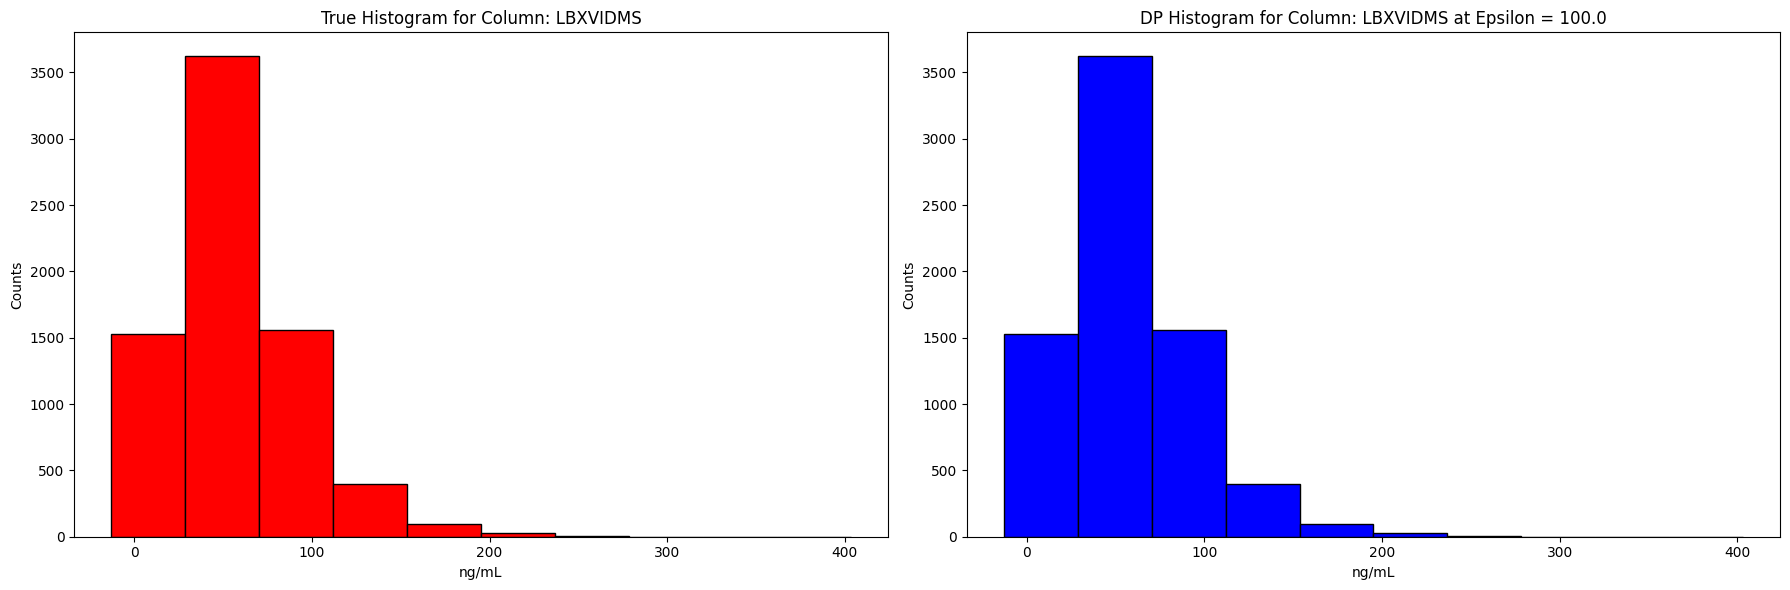

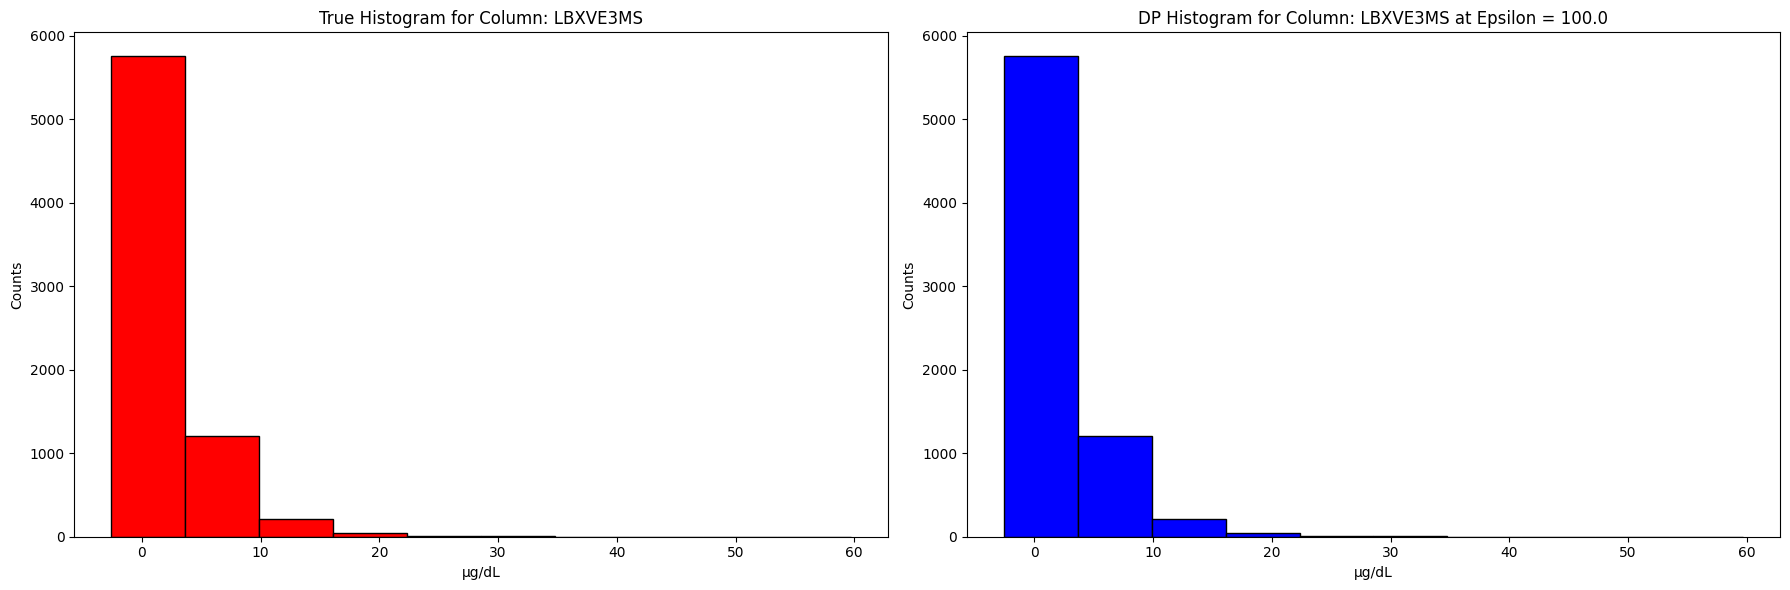

In [149]:
# plot_histograms(true_hist, noisy_hist, bin_edges, results_laplace[col]['optimal_epsilon'], col)\

for col, data in results_laplace.items():
    true_hist = data['true_hist'] 
    noisy_hist = data['optimal_histogram']
    bin_edges = data['bin_edges']
    epsilon = data['optimal_epsilon']
    
    # plot_histograms(true_hist, bin_edges, epsilon, col, 'red')
    plot_histograms(true_hist, noisy_hist, bin_edges, epsilon, col, 'red', 'blue')

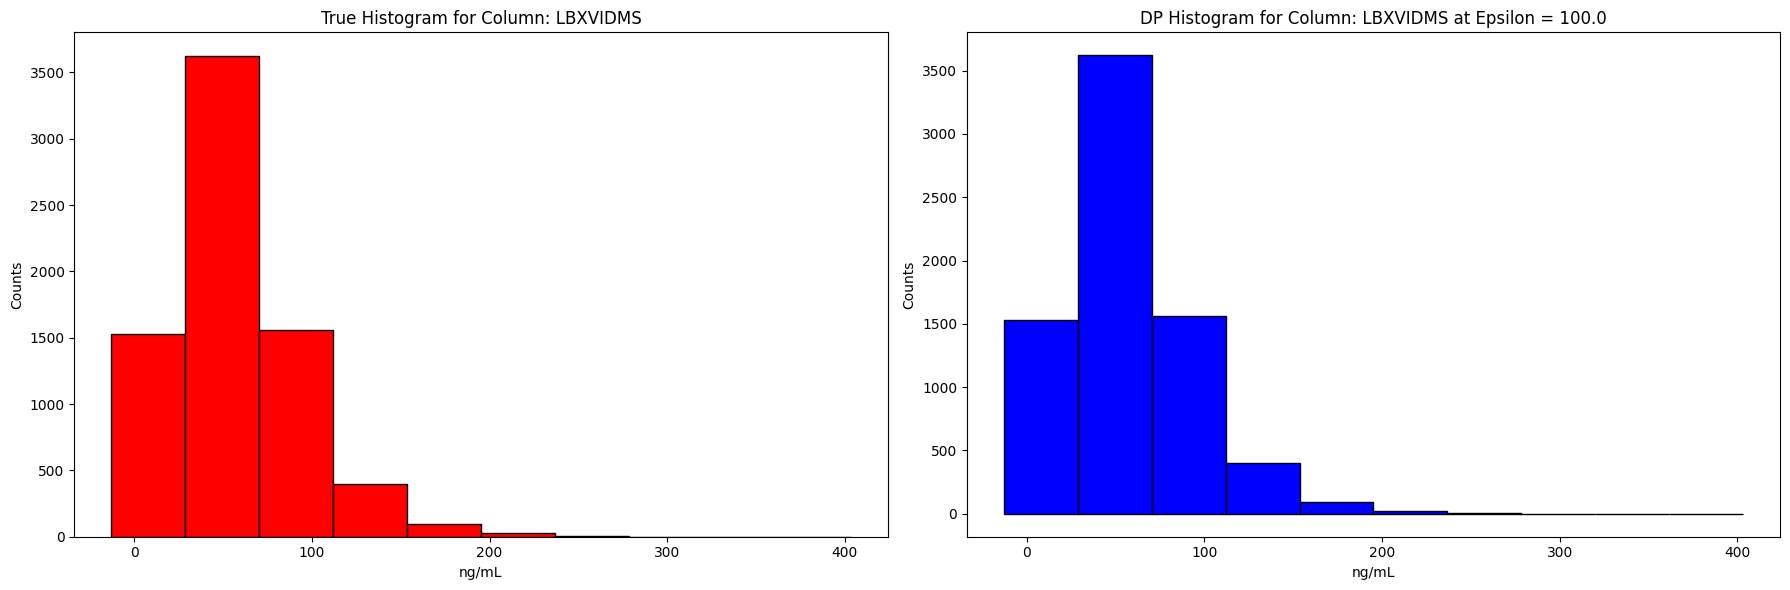

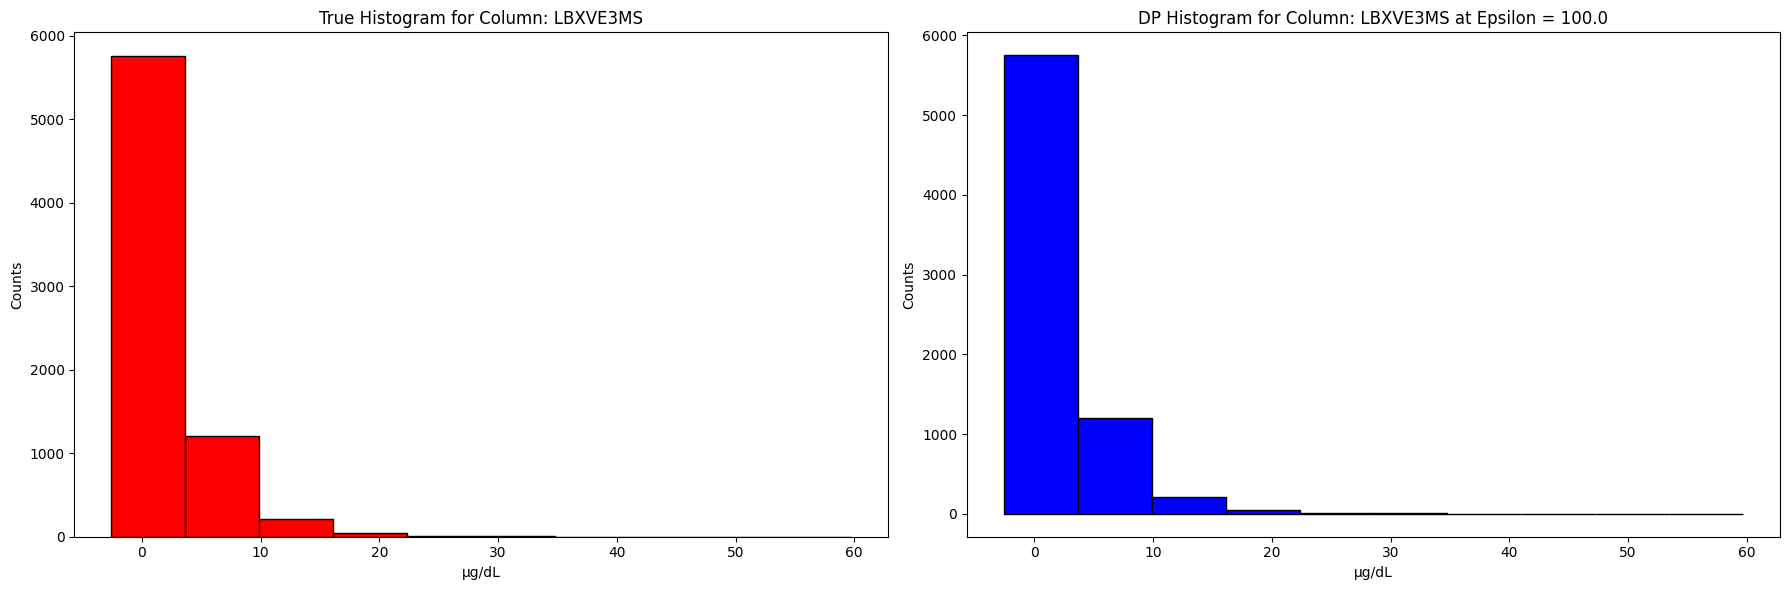

In [151]:
for col, data in results_gaussian.items():
    true_hist = data['true_hist'] 
    noisy_hist = data['optimal_histogram']
    bin_edges = data['bin_edges']
    epsilon = data['optimal_epsilon']
    
    # plot_histograms(true_hist, bin_edges, epsilon, col, 'red')
    plot_histograms(true_hist, noisy_hist, bin_edges, epsilon, col, 'red', 'blue')

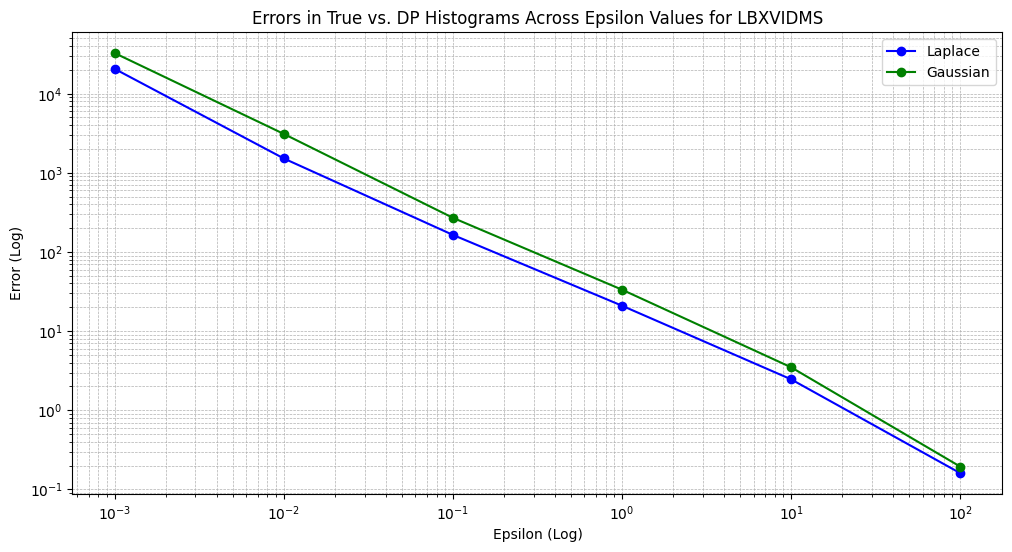

In [155]:

plt.figure(figsize=(12, 6))

# Plot for LBXVIDMS
plt.plot(eps_lst, results_laplace[d_e_main[0]]['errors'], marker='o', label='Laplace', color='blue')
plt.plot(eps_lst, results_gaussian[d_e_main[0]]['errors'], marker='o', label='Gaussian', color='green')

# plt.plot(eps_lst, results_laplace[d_e_main[1]]['errors'], marker='o', label='LBXVE3MS', color='green')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Epsilon (Log)')
plt.ylabel('Error (Log)')
plt.title('Errors in True vs. DP Histograms Across Epsilon Values for LBXVIDMS')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.show()